<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


- Using the AG News dataset (this dataset consists of mainly four different categories : World, Sports, Business, Science/Technology)

##LDA

In [ ]:
# Import necessary libraries
!pip install datasets
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.utils import simple_preprocess
from gensim.models import LdaModel
from gensim import corpora
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel

# Preprocessing setup
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Top 10 Topics:
Topic 1: 0.025*"china" + 0.025*"leader" + 0.024*"election" + 0.022*"wireless" + 0.019*"british" + 0.017*"japan" + 0.016*"police" + 0.016*"server" + 0.013*"linux" + 0.012*"muslim"
Topic 2: 0.025*"charge" + 0.025*"test" + 0.024*"presidential" + 0.023*"growth" + 0.021*"half" + 0.019*"net" + 0.019*"street" + 0.017*"wall" + 0.015*"scientist" + 0.014*"following"
Topic 3: 0.023*"quot" + 0.015*"week" + 0.015*"friday" + 0.014*"could" + 0.013*"president" + 0.012*"would" + 0.011*"saturday" + 0.011*"new" + 0.011*"bush" + 0.009*"washington"
Topic 4: 0.029*"afp" + 0.018*"update" + 0.017*"european" + 0.017*"earnings" + 0.015*"news" + 0.014*"court" + 0.013*"trade" + 0.012*"right" + 0.012*"death" + 0.012*"round"
Topic 5: 0.020*"red" + 0.018*"sox" + 0.016*"victory" + 0.015*"night" + 0.015*"lead" + 0.014*"talk" + 0.013*"minister" + 0.013*"boston" + 0.012*"bomb" + 0.012*"run"
Topic 6: 0.028*"iraq" + 0.023*"security" + 0.023*"yesterday" + 0.017*"baghdad" + 0.013*"least" + 0.013*"home" + 0.01

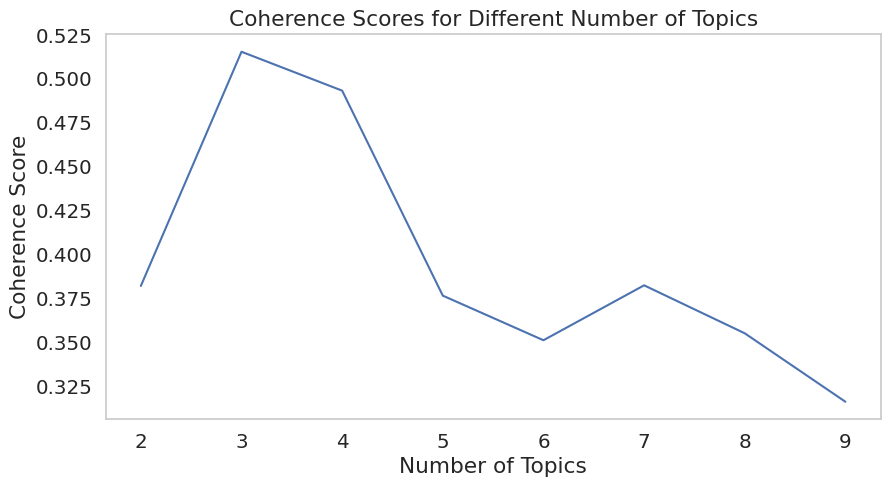

In [ ]:

# Load dataset
dataset = load_dataset("ag_news", split='test')  # Example dataset
documents = dataset['text'][:5000]  # Use the first 5000 records for efficiency

# Stopwords and lemmatization
stop_words = set(stopwords.words('english'))
stop_words.update(['from', 'subject', 're', 'edu', 'use'])
lemmatizer = WordNetLemmatizer()

# Preprocess documents
def preprocess(doc):
    return [
        lemmatizer.lemmatize(word)  # Lemmatization
        for word in simple_preprocess(doc, deacc=True)  # Tokenize, lowercase, and remove punctuation
        if word not in stop_words and len(word) > 2  # Remove stopwords and short tokens
    ]

data = [preprocess(doc) for doc in documents]

# Create dictionary and corpus for topic modeling
id2word = corpora.Dictionary(data)
corpus = [id2word.doc2bow(text) for text in data]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=100,
                     update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Extract and print top 10 topics
topics = lda_model.print_topics(num_words=10)
print("Top 10 Topics:")
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")

# Compute coherence scores for various numbers of topics
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=20, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100,
                         update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Run coherence evaluation
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data, start=2, limit=10, step=1)

# Plot coherence scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Number of Topics")
plt.grid()
plt.show()

### Topic Modeling Analysis

#### **1. Features (Text Representation) Used for Topic Modeling**
The text data was processed using the following steps:
- **Tokenization**: Breaking the text into individual words.
- **Stopword Removal**: Eliminating common words like "the," "is," and "and" that do not contribute to meaningful topics.
- **Lemmatization**: Reducing words to their base form (e.g., "running" → "run").
- **Bag-of-Words Representation**: Converting the text into a numerical format using word frequency counts, creating a corpus for analysis.
- **Dictionary Creation**: A mapping between unique tokens and their integer IDs for the corpus.

In **LDA (Latent Dirichlet Allocation)**, text is represented using the **Bag-of-Words (BoW)** approach:
- Each document is represented as a sparse vector, where each dimension corresponds to a unique word in the corpus, and the value represents its frequency in the document.
- This BoW representation ignores word order and context but captures the overall distribution of words in the dataset.
- LDA then uses this representation to assign words to topics probabilistically, identifying latent themes in the dataset.

These features were then used as input for the **LDA** model to discover latent topics.

---

#### **2. Top 10 Clusters for Topic Modeling**

The **LDA model** extracted the following topics, each represented by the 10 most significant keywords:

1. **Topic 1**: "china," "leader," "election," "wireless," "british," "japan," "police," "server," "linux," "muslim."
2. **Topic 2**: "charge," "test," "presidential," "growth," "half," "net," "street," "wall," "scientist," "following."
3. **Topic 3**: "quot," "week," "friday," "could," "president," "would," "saturday," "new," "bush," "washington."
4. **Topic 4**: "afp," "update," "european," "earnings," "news," "court," "trade," "right," "death," "round."
5. **Topic 5**: "red," "sox," "victory," "night," "lead," "talk," "minister," "boston," "bomb," "run."
6. **Topic 6**: "iraq," "security," "yesterday," "baghdad," "least," "home," "last," "troop," "international," "city."
7. **Topic 7**: "new," "said," "reuters," "tuesday," "year," "company," "profit," "report," "price," "oil."
8. **Topic 8**: "thursday," "microsoft," "people," "group," "may," "internet," "technology," "open," "phone," "since."
9. **Topic 9**: "first," "world," "two," "one," "game," "year," "time," "day," "state," "united."
10. **Topic 10**: "killed," "com," "reuters," "bank," "business," "largest," "attack," "said," "gaza," "investor."

---

#### **3. Topic Summaries**

Below are the summarized topics and their likely meanings based on the most frequent keywords:

1. **Global Politics and Technology**:
   - Focused on international matters, elections, technology (e.g., "wireless," "server"), and societal issues (e.g., "muslim").

2. **Finance and Business Growth**:
   - Highlights business performance, Wall Street, and scientific or technological advancements (e.g., "growth," "net," "scientist").

3. **U.S. Politics and Leadership**:
   - Emphasizes U.S.-centric political updates, with mentions of leaders like "Bush" and contexts around governance.

4. **European and Legal Affairs**:
   - Includes topics about Europe, trade, court rulings, and earnings, focusing on economic and social news.

5. **Sports Events and Results**:
   - Centers on sports, with terms like "red sox," "victory," and "boston," indicating competitions and achievements.

6. **Conflict and Security in Iraq**:
   - Discusses security issues in Iraq, with keywords like "Baghdad," "troop," and "yesterday," reflecting conflict news.

7. **Economic and Corporate Updates**:
   - Focuses on company reports, profits, prices, and the energy sector (e.g., "oil," "report").

8. **Technology and Innovation**:
   - Covers technological advancements, companies like Microsoft, and internet-related developments.

9. **World Events and General News**:
   - Broad focus on global events, including games, achievements, and important dates.

10. **Conflicts and Business**:
    - Mix of conflict reporting (e.g., "killed," "attack") and business updates (e.g., "bank," "investor").

---

#### **4. Insights from the Coherence Score Graph**

The coherence score graph indicates the following:
- The **optimal number of topics** is likely around **3**, as the coherence score peaks at this point (~0.525). This suggests that the dataset can be effectively grouped into three broad themes.
- After the peak, coherence scores decrease, indicating that dividing the dataset into more than three topics introduces noise or overlaps among topics.
- While the analysis was conducted using 10 topics to extract finer-grained themes, the graph highlights that a simpler topic structure (fewer topics) might better represent the data.

---

### Conclusion

The **LDA model** successfully identified 10 meaningful topics from the dataset, ranging from global politics, finance, and sports to technological and societal updates. The coherence graph suggests that the dataset is optimally categorized with fewer topics, around 3, but the chosen 10-topic model provides more granular insights into the data.


## LSA

Top 10 Topics (LSA):
Topic 1: 0.395*"reuters" + 0.350*"new" + 0.299*"said" + 0.167*"year" + 0.155*"stock" + 0.144*"oil" + 0.136*"york" + 0.127*"price" + 0.123*"fullquote" + 0.112*"two"
Topic 2: 0.413*"reuters" + 0.269*"fullquote" + 0.242*"stock" + -0.194*"year" + -0.172*"two" + 0.164*"investor" + -0.159*"quot" + -0.145*"first" + -0.143*"said" + 0.140*"http"
Topic 3: 0.681*"new" + -0.329*"reuters" + -0.316*"said" + 0.189*"york" + 0.157*"oil" + -0.144*"iraq" + 0.142*"price" + -0.090*"two" + -0.086*"killed" + -0.083*"gaza"
Topic 4: -0.613*"oil" + -0.444*"price" + 0.201*"new" + 0.151*"com" + 0.147*"fullquote" + 0.142*"microsoft" + -0.130*"high" + -0.120*"record" + 0.120*"inc" + -0.116*"iraq"
Topic 5: 0.340*"said" + -0.288*"reuters" + 0.257*"company" + -0.238*"game" + 0.191*"microsoft" + -0.178*"win" + 0.163*"quot" + -0.162*"first" + -0.161*"two" + 0.141*"inc"
Topic 6: -0.425*"new" + 0.405*"year" + -0.278*"iraq" + -0.217*"said" + 0.213*"first" + 0.122*"world" + 0.118*"game" + -0.115*"baghda

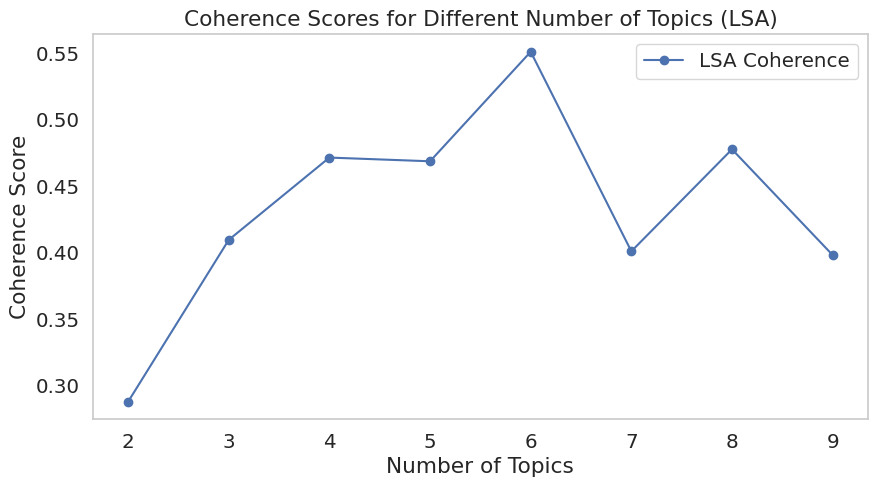

In [ ]:
from gensim.models import LsiModel

# Train the LSA model
lsa_model = LsiModel(corpus=corpus, id2word=id2word, num_topics=10)

# Extract and print top 10 topics
topics_lsa = lsa_model.print_topics(num_words=10)
print("Top 10 Topics (LSA):")
for idx, topic in topics_lsa:
    print(f"Topic {idx + 1}: {topic}")

# Compute coherence scores for various numbers of topics
def compute_coherence_values_lsa(dictionary, corpus, texts, start=2, limit=20, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Train LSA model
        model = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        # Compute coherence score
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Run coherence evaluation
model_list, coherence_values = compute_coherence_values_lsa(dictionary=id2word, corpus=corpus, texts=data, start=2, limit=10, step=1)

# Plot coherence scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), coherence_values, marker='o', label='LSA Coherence')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Number of Topics (LSA)")
plt.grid()
plt.legend()
plt.show()


# **Topic Modeling Analysis (LSA)**
## **1. Top 10 Clusters for Topic Modeling**

The **LSA model** extracted the following topics, each represented by the 10 most significant keywords:

1. **Topic 1**: "reuters," "new," "said," "year," "stock," "oil," "york," "price," "fullquote," "two."
2. **Topic 2**: "reuters," "fullquote," "stock," "year," "two," "investor," "quot," "first," "said," "http."
3. **Topic 3**: "new," "reuters," "said," "york," "oil," "iraq," "price," "two," "killed," "gaza."
4. **Topic 4**: "oil," "price," "new," "com," "fullquote," "microsoft," "high," "record," "inc," "iraq."
5. **Topic 5**: "said," "reuters," "company," "game," "microsoft," "win," "quot," "first," "two," "new."
6. **Topic 6**: "new," "year," "iraq," "said," "first," "world," "game," "baghdad," "quarter," "profit."
7. **Topic 7**: "quot," "year," "said," "new," "say," "two," "gaza," "game," "first," "world."
8. **Topic 8**: "quot," "year," "microsoft," "company," "said," "software," "game," "corp," "open," "new."
9. **Topic 9**: "said," "microsoft," "reuters," "year," "quot," "iraq," "afp," "gaza," "world," "two."
10. **Topic 10**: "reuters," "two," "bush," "year," "president," "game," "afp," "said," "kerry," "state."

---

## **2. Topic Summaries**

Here is the interpretation of the topics based on the most significant keywords:

1. **News and Market Trends**:
   - Focuses on global news, stock markets, and financial updates, with mentions of "reuters," "stock," and "price."

2. **Stock and Investor Activities**:
   - Centers on investor concerns and stock performance, with terms like "investor" and "fullquote."

3. **Global and Conflict News**:
   - Highlights international updates, especially conflicts in regions like "Iraq" and "Gaza," along with oil prices.

4. **Oil and Economic Performance**:
   - Focuses specifically on oil, price fluctuations, and market performance.

5. **Technology and Games**:
   - Discusses technology companies (e.g., Microsoft) and entertainment, particularly games.

6. **Yearly and Global News**:
   - Captures general global events, annual updates, and conflicts, with mentions of "profit" and "baghdad."

7. **Opinions and Perspectives**:
   - Likely related to quoted opinions, global events, and updates (e.g., "say," "quot," "game").

8. **Tech and Corporate Updates**:
   - Focused on software and tech companies, with emphasis on Microsoft and corporate performance.

9. **Conflict and Political News**:
   - Captures political and conflict-related updates, with mentions of Iraq, Gaza, and leadership.

10. **Politics and Leadership**:
    - Centers on political figures (e.g., Bush, Kerry) and governance-related news.

---


##BERTopic

In [ ]:
!pip install bertopic

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [ ]:
# Use the first 5000 documents for training
documents = dataset['text'][:5000]

# Initialize BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model on the dataset
topics, probabilities = topic_model.fit_transform(documents)

# Visualize the topics
print("\nTop 10 Topics (BERTopic):")
topic_info = topic_model.get_topic_info()
for topic in topic_info.head(11).itertuples():
    print(f"Topic {topic.Topic}: {topic.Name}")

2024-11-24 12:48:18,189 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

2024-11-24 12:48:25,147 - BERTopic - Embedding - Completed ✓
2024-11-24 12:48:25,149 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-24 12:48:32,270 - BERTopic - Dimensionality - Completed ✓
2024-11-24 12:48:32,273 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-24 12:48:34,180 - BERTopic - Cluster - Completed ✓
2024-11-24 12:48:34,189 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-24 12:48:34,515 - BERTopic - Representation - Completed ✓



Top 10 Topics (BERTopic):
Topic -1: -1_to_the_of_in
Topic 0: 0_league_arsenal_madrid_champions
Topic 1: 1_athens_olympic_gold_medal
Topic 2: 2_patriots_nfl_ravens_season
Topic 3: 3_baghdad_iraq_iraqi_najaf
Topic 4: 4_profit_earnings_percent_quarterly
Topic 5: 5_linux_ibm_sun_supercomputer
Topic 6: 6_sox_red_boston_yankees
Topic 7: 7_formula_prix_grand_race
Topic 8: 8_open_final_tennis_sharapova
Topic 9: 9_microsoft_windows_xp_sp2


In [ ]:
# Plot the frequency of topics
topic_model.visualize_barchart(top_n_topics=10)

## **Topic Modeling Analysis (BERTopic)**

---

### **1. Features (Text Representation) Used for Topic Modeling**
In **BERTopic**, text is represented using **contextual embeddings** from pre-trained transformer models (e.g., BERT). These embeddings capture the semantic meaning of sentences and are mapped into dense vector representations (e.g., 768-dimensional for BERT). The process involves:
1. **Embedding Generation**: Documents are converted into dense vectors that preserve context and semantics.
2. **Dimensionality Reduction**: High-dimensional embeddings are reduced using **UMAP** for clustering efficiency.
3. **Clustering**: Reduced vectors are clustered using **HDBSCAN**, which dynamically identifies topics based on density.
4. **Topic Representation**: The most relevant keywords for each cluster are extracted to represent the topics.

This method ensures that topics reflect the context and meaning of the underlying text.

---

### **2. Top 10 Topics for Topic Modeling**

The **BERTopic model** extracted the following topics, represented by the most significant keywords:

1. **Topic -1**: "-1_to_the_of_in"
2. **Topic 0**: "league_arsenal_madrid_champions"
3. **Topic 1**: "athens_olympic_gold_medal"
4. **Topic 2**: "patriots_nfl_ravens_season"
5. **Topic 3**: "baghdad_iraq_iraqi_najaf"
6. **Topic 4**: "profit_earnings_percent_quarterly"
7. **Topic 5**: "linux_ibm_sun_supercomputer"
8. **Topic 6**: "sox_red_boston_yankees"
9. **Topic 7**: "formula_prix_grand_race"
10. **Topic 8**: "open_final_tennis_sharapova"
11. **Topic 9**: "microsoft_windows_xp_sp2"

---

### **3. Topic Summaries**

1. **Miscellaneous/General**: Generic content, likely noise or irrelevant text.
2. **Football Leagues**: Discusses European football leagues like Arsenal and Madrid.
3. **Olympic Sports**: Covers Athens Olympics and gold medal events.
4. **NFL Season**: Focuses on NFL teams like Patriots and Ravens, and their seasons.
5. **Conflict in Iraq**: Discusses events in Baghdad, Iraq, and Najaf.
6. **Corporate Earnings**: Highlights financial updates like quarterly profits and earnings percentages.
7. **Supercomputing and Technology**: Discusses advancements in Linux, IBM, and supercomputers.
8. **Baseball Teams**: Highlights baseball teams such as the Red Sox and Yankees.
9. **Formula 1 Racing**: Covers Formula 1 events and Grand Prix races.
10. **Tennis Championships**: Focuses on tennis tournaments, including Sharapova in the finals.
11. **Microsoft Technology**: Discusses Microsoft products like Windows XP and its updates.

---

### **4. Conclusion**

The **BERTopic model** effectively identifies meaningful topics using contextual embeddings and clustering. Its ability to preserve semantics and adaptively cluster documents makes it highly effective for modern, unstructured text datasets.


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

### **Feature Selection for Sentiment Classification**

#### **1. TF-IDF Vectorization**
- **Reason for Selection**:
  - **Text Representation**: Converts text data into numerical format suitable for machine learning models.
  - **Relevance Scaling**: Assigns importance to words based on their frequency in a document and their rarity across the entire dataset.
  - **Dimensionality Control**: The parameter `max_features=5000` limits the vocabulary to the top 5000 most important terms, balancing computational efficiency and capturing meaningful features.
  - **Stopword Removal**: Eliminates common words (e.g., "the", "and") that do not contribute to the sentiment.

#### **2. Cleaned Review**
- **Reason for Selection**:
  - The `cleaned_review` column in the imdb movie review dataset collected in assignment 3, contains text preprocessed to remove noise such as special characters, extra spaces, and non-alphanumeric content.
  - Cleaned data improves the accuracy and efficiency of feature extraction techniques like TF-IDF.

#### **Why TF-IDF is Preferred over Count Vectorization**
- **Focus on Unique Words**:
  - TF-IDF reduces the impact of frequent but uninformative words, giving higher weight to terms that are unique to a document.
- **Sparse Matrix**:
  - Efficiently represents large text data with fewer computations compared to raw counts.

#### **Feature Importance**
By using TF-IDF with the cleaned reviews, the features selected emphasize:
- Words or phrases that strongly correlate with positive or negative sentiment.
- Unique terms in each review that contribute to sentiment analysis.
- Eliminates the noise of common or overly frequent terms that add little value to the sentiment classification task.


In [ ]:
!pip install matplotlib scikit-learn pandas

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv("imdb_movie_reviews_labelled.csv")

df.head(15)

,Review,Cleaned Review,Sentiment
0,Best movie ever!michalberanek20 July 2023I saw...,best movi evermichalberanek juli saw mani movi...,Positive
1,Fully told storyadamgontarz21 July 2023There w...,fulli told storyadamgontarz juli awesom hour c...,Positive
2,I did not expect to not love this filmpostman1...,expect love filmpostman juli oppenheim solid f...,Positive
3,Iconic quote in the sex scene!??cagatanberitan...,icon quot sex scenecagatanberitan juli warn sp...,Neutral
4,"Overwhelming, powerful and emphatic, a film th...",overwhelm power emphat film stay youpotassiumm...,Positive
5,LEGENDARYpaze-8476520 July 2023Nolan has succe...,legendarypaz juli nolan succeed creat differ c...,Positive
6,Finely crafted well presented but tiresome?ACo...,fine craft well present tiresomeacollegestud j...,Neutral
7,It's a Nolan Masterclass: Phenomenal performan...,nolan masterclass phenomen perform across boar...,Positive
8,One of the best films of 2023dakotadickenson-8...,one best film dakotadickenson juli oppenheim f...,Positive
9,"Oppenheimer"" takes you on a guilt trip through...",oppenheim take guilt trip mind scientistsaikir...,Positive


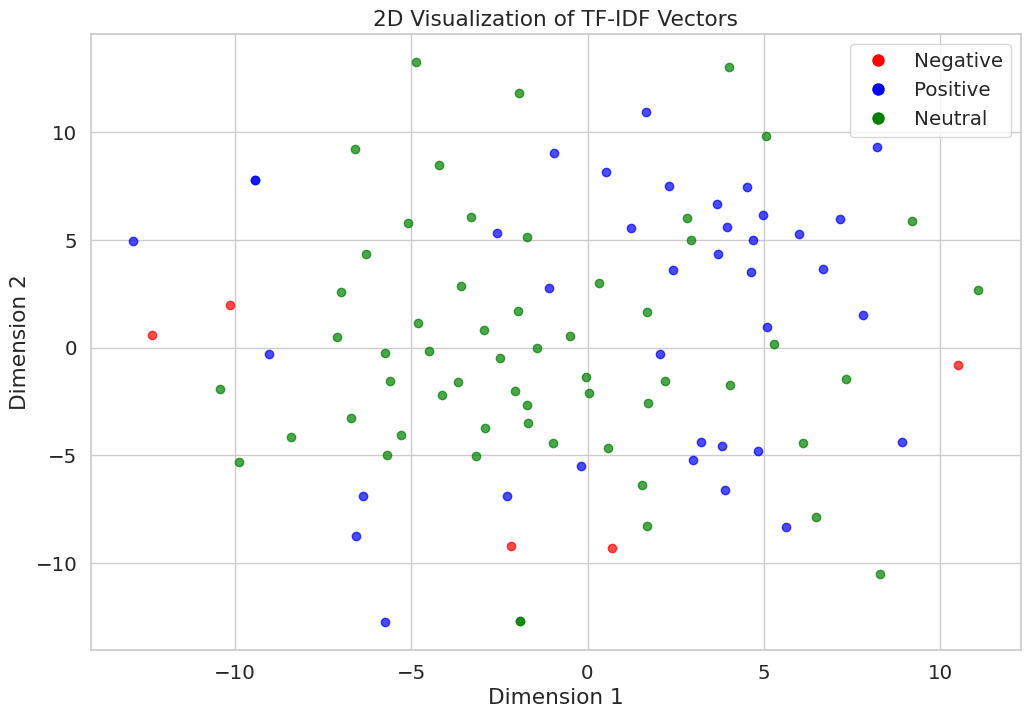

In [ ]:
# Split dataset into features and labels
X = df['Cleaned Review']
y = df['Sentiment']

# Encode the labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Dimensionality Reduction and Visualization for TF-IDF
def plot_tfidf_vectors(tfidf_matrix, labels, num_samples=100):
    num_samples = min(num_samples, tfidf_matrix.shape[0])
    pca = PCA(n_components=50, random_state=42)
    reduced_vectors = pca.fit_transform(tfidf_matrix.toarray()[:num_samples])
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
    tsne_vectors = tsne.fit_transform(reduced_vectors)
    labels = labels[:num_samples]
    color_map = {0: 'red', 1: 'blue', 2: 'green'}
    label_map = {0: "Negative", 1: "Positive", 2: "Neutral"}
    plt.figure(figsize=(12, 8))
    for i, label in enumerate(labels):
        plt.scatter(tsne_vectors[i, 0], tsne_vectors[i, 1], c=color_map[label], alpha=0.7, label=label_map[label] if i == 0 else "")
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Negative'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Positive'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Neutral'),
    ]
    plt.legend(handles=handles, loc="upper right")
    plt.title("2D Visualization of TF-IDF Vectors")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Plot TF-IDF Vectors
plot_tfidf_vectors(X_train_tfidf, y_train, num_samples=100)


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def rank_sentences(tfidf_matrix, sentences, query, vectorizer):
    query_tfidf = vectorizer.transform([query])
    similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()
    ranked_indices = np.argsort(similarities)[::-1]
    ranked_sentences = [(sentences[i], similarities[i]) for i in ranked_indices]
    return ranked_sentences

query_sentence = "great acting and an amazing storyline"

ranked_sentences = rank_sentences(X_train_tfidf, X_train.tolist(), query_sentence, tfidf_vectorizer)

ranked_df = pd.DataFrame(ranked_sentences[:10], columns=["Sentence", "Similarity"])
print(ranked_df)


                                            Sentence  Similarity
0  great portray historyankushsarkar juli warn sp...    0.282632
1  hour talk boredraidersofthelostcommunist juli ...    0.186965
2  masterpiec timeabdjkxr juli everi thing perfec...    0.178657
3  cinema personifi incred moviecinemapersonifi j...    0.169874
4  beauti work seen nnjjuubbhhyy juli great movi ...    0.169846
5  absolut masterpieceaaronfarv juli cillian murp...    0.168411
6  speechlessdmustang juli oppenheim great well c...    0.166069
7  best movi evermichalberanek juli saw mani movi...    0.156167
8  disappointedseymakara juli realli overr movi c...    0.152955
9  documentarynot moviepranilb juli great work no...    0.151231


In [ ]:
# Display the mapping
print("Label Encoding Mapping:")
for original_label, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{original_label}: {encoded_label}")

Label Encoding Mapping:
Negative: 0
Neutral: 1
Positive: 2


- Since there are very few samples of negative, we can label neutral to negative as well to avoid class imbalance and also to perform binary classification

### Models used:
###Logistic Regression
Logistic Regression is a linear model suitable for sentiment classification tasks. It efficiently handles high-dimensional data such as TF-IDF and provides quick training and predictions. Its simplicity makes it ideal for problems with linear relationships between features and sentiments.

### Random Forest
Random Forest is a powerful ensemble method that excels in capturing non-linear relationships in the data. It is robust to overfitting and performs well on complex datasets with high-dimensional feature spaces like TF-IDF, making it a reliable choice for sentiment classification.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Convert Neutral (1) to Negative (0)
y_train_modified = np.where(y_train == 1, 0, y_train)
y_test_modified = np.where(y_test == 1, 0, y_test)

# Model 1: Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_tfidf, y_train_modified)
y_pred_logreg = logreg.predict(X_test_tfidf)

# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_tfidf, y_train_modified)
y_pred_rf = rf.predict(X_test_tfidf)

# Cross-validation (5-fold) with F1 score (weighted)
cv_logreg = cross_val_score(logreg, X_train_tfidf, y_train_modified, cv=5, scoring='f1_weighted')
cv_rf = cross_val_score(rf, X_train_tfidf, y_train_modified, cv=5, scoring='f1_weighted')

print("Cross-validation F1 Score (Logistic Regression, 5-fold):", cv_logreg.mean())
print("Cross-validation F1 Score (Random Forest, 5-fold):", cv_rf.mean())

Cross-validation F1 Score (Logistic Regression, 5-fold): 0.7131991845363939
Cross-validation F1 Score (Random Forest, 5-fold): 0.778530585407783


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation Metrics
def evaluate_model(y_test_modified, y_pred):
    accuracy = accuracy_score(y_test_modified, y_pred)
    precision = precision_score(y_test_modified, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_modified, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_modified, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

# Evaluate Logistic Regression and Random Forest
metrics_logreg = evaluate_model(y_test_modified, y_pred_logreg)
metrics_rf = evaluate_model(y_test_modified, y_pred_rf)

# Print the performance comparison
print("Performance Comparison:")

print("\nLogistic Regression Performance:")
print(f"Accuracy: {metrics_logreg[0]:.4f}, Precision: {metrics_logreg[1]:.4f}, Recall: {metrics_logreg[2]:.4f}, F1 Score: {metrics_logreg[3]:.4f}")

print("\nRandom Forest Performance:")
print(f"Accuracy: {metrics_rf[0]:.4f}, Precision: {metrics_rf[1]:.4f}, Recall: {metrics_rf[2]:.4f}, F1 Score: {metrics_rf[3]:.4f}")


Performance Comparison:

Logistic Regression Performance:
Accuracy: 0.7750, Precision: 0.7754, Recall: 0.7750, F1 Score: 0.7604

Random Forest Performance:
Accuracy: 0.8250, Precision: 0.8243, Recall: 0.8250, F1 Score: 0.8193


## Performance Comparison of Sentiment Classification Models

### Logistic Regression Performance
- **Accuracy**: 0.7750
- **Precision**: 0.7754
- **Recall**: 0.7750
- **F1 Score**: 0.7604

### Random Forest Performance
- **Accuracy**: 0.8250
- **Precision**: 0.8243
- **Recall**: 0.8250
- **F1 Score**: 0.8193

### Insights:
- **Random Forest** outperforms Logistic Regression in all evaluation metrics, particularly achieving a higher F1 score and accuracy.
- Logistic Regression provides competitive results and is computationally efficient, but Random Forest is better suited for handling the complexity of the dataset and feature space.
- Based on these results, Random Forest is the recommended model for this sentiment classification task.


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
# Write your code here
import pandas as pd
import sys
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [ ]:
csv_path = "train.csv"
df_train = pd.read_csv(csv_path, sep = ',')

csv_path = "test.csv"
df_test = pd.read_csv(csv_path, sep = ',')

In [ ]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [ ]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- There are 1460 rows and 81 columns and many columns with large number of null entries like PoolQC, MiscFeature
- The columns have Three types of datatypes: float64(3), int64(35), object(43).

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

- There are 1459 rows and 80 columns and many columns with null entries like PoolQC, MiscFeature etc
- The columns have Three types of datatypes:  float64(11), int64(26), object(43)

In [ ]:
df_train['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


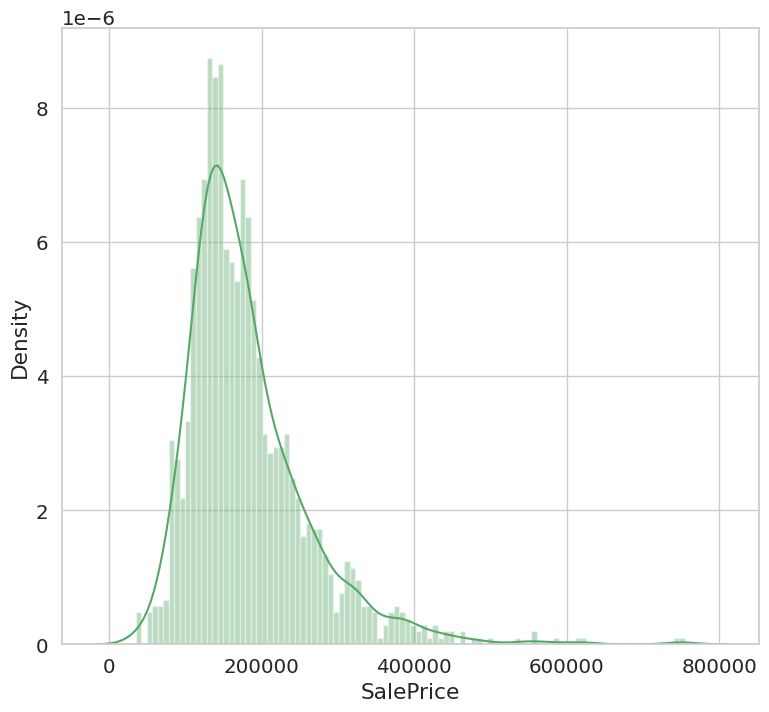

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

Text(163.2500000000001, 0.5, 'Features')

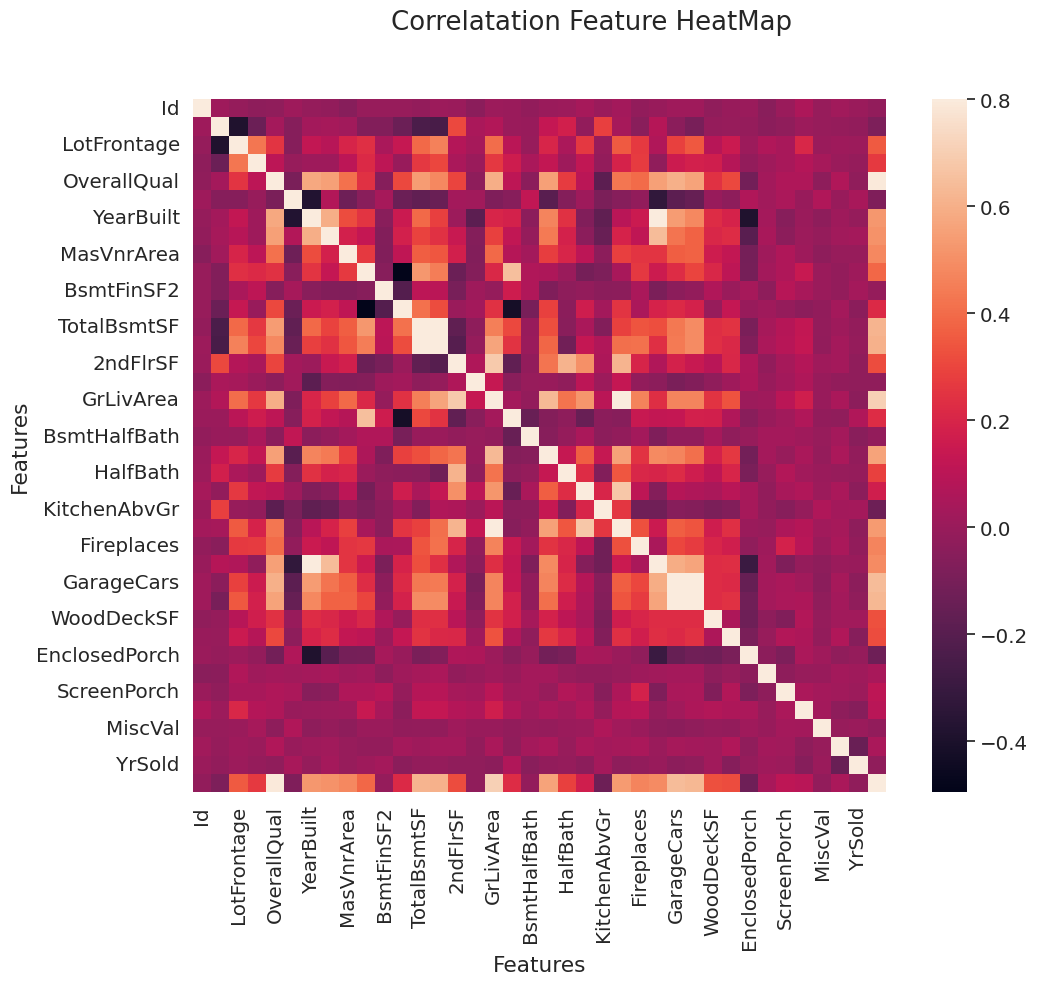

In [ ]:
# Select only numeric columns (float and int types)
numeric_df = df_train.select_dtypes(include=['float', 'int'])

# Compute the correlation matrix for numeric columns
corr_mat = numeric_df.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

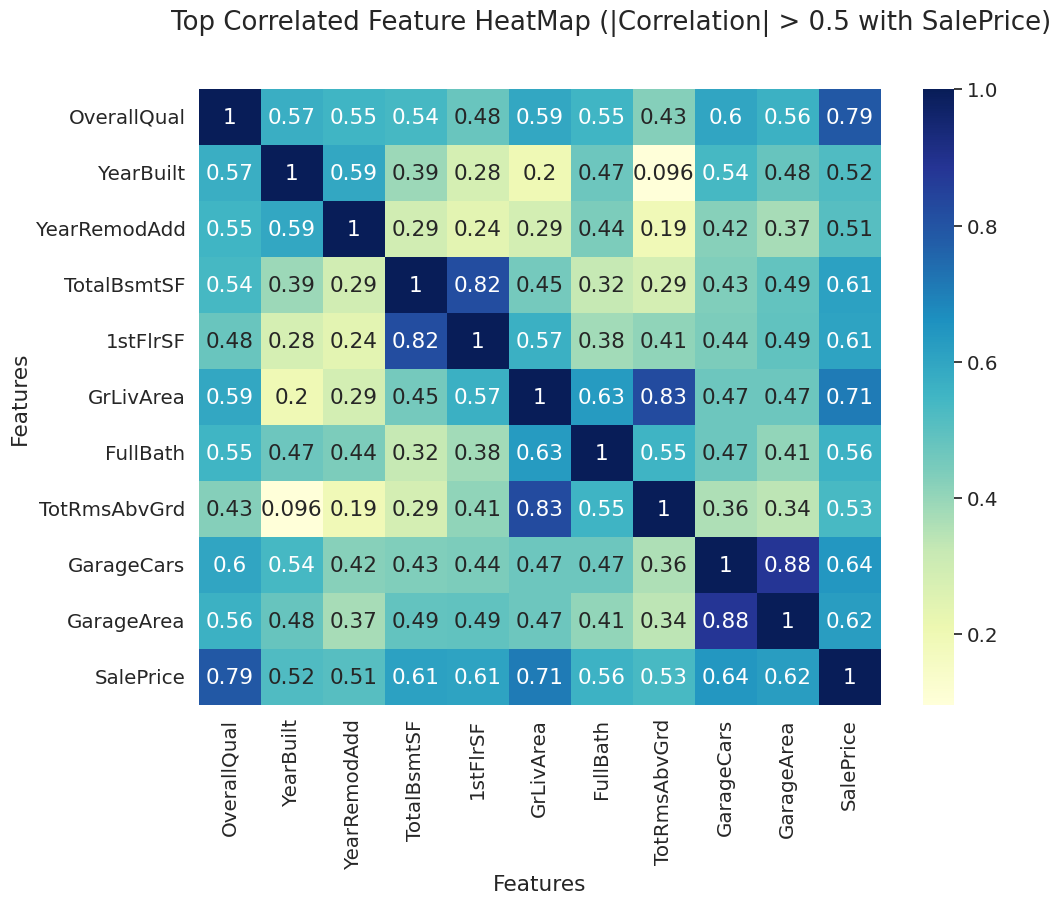

In [ ]:
# Most correlated features
corr_mat = numeric_df.corr()

sns.set(font_scale=1.3)
plt.figure(figsize=(11, 8))

# Select features with absolute correlation > 0.5
top_corr = corr_mat.index[abs(corr_mat["SalePrice"]) > 0.5]

# Heatmap of top correlated features
g = sns.heatmap(numeric_df[top_corr].corr(), annot=True, cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (|Correlation| > 0.5 with SalePrice)")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


- OverallQual and GrLivArea seem to be the most correlated to SalePrice

In [ ]:
print("Correlation Values (Absolute Correlation with SalePrice)")

corr = numeric_df.corr().drop(index='SalePrice')

sorted_corr = corr["SalePrice"].abs().sort_values(ascending=False)


print(sorted_corr)


Correlation Values (Absolute Correlation with SalePrice)
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFin

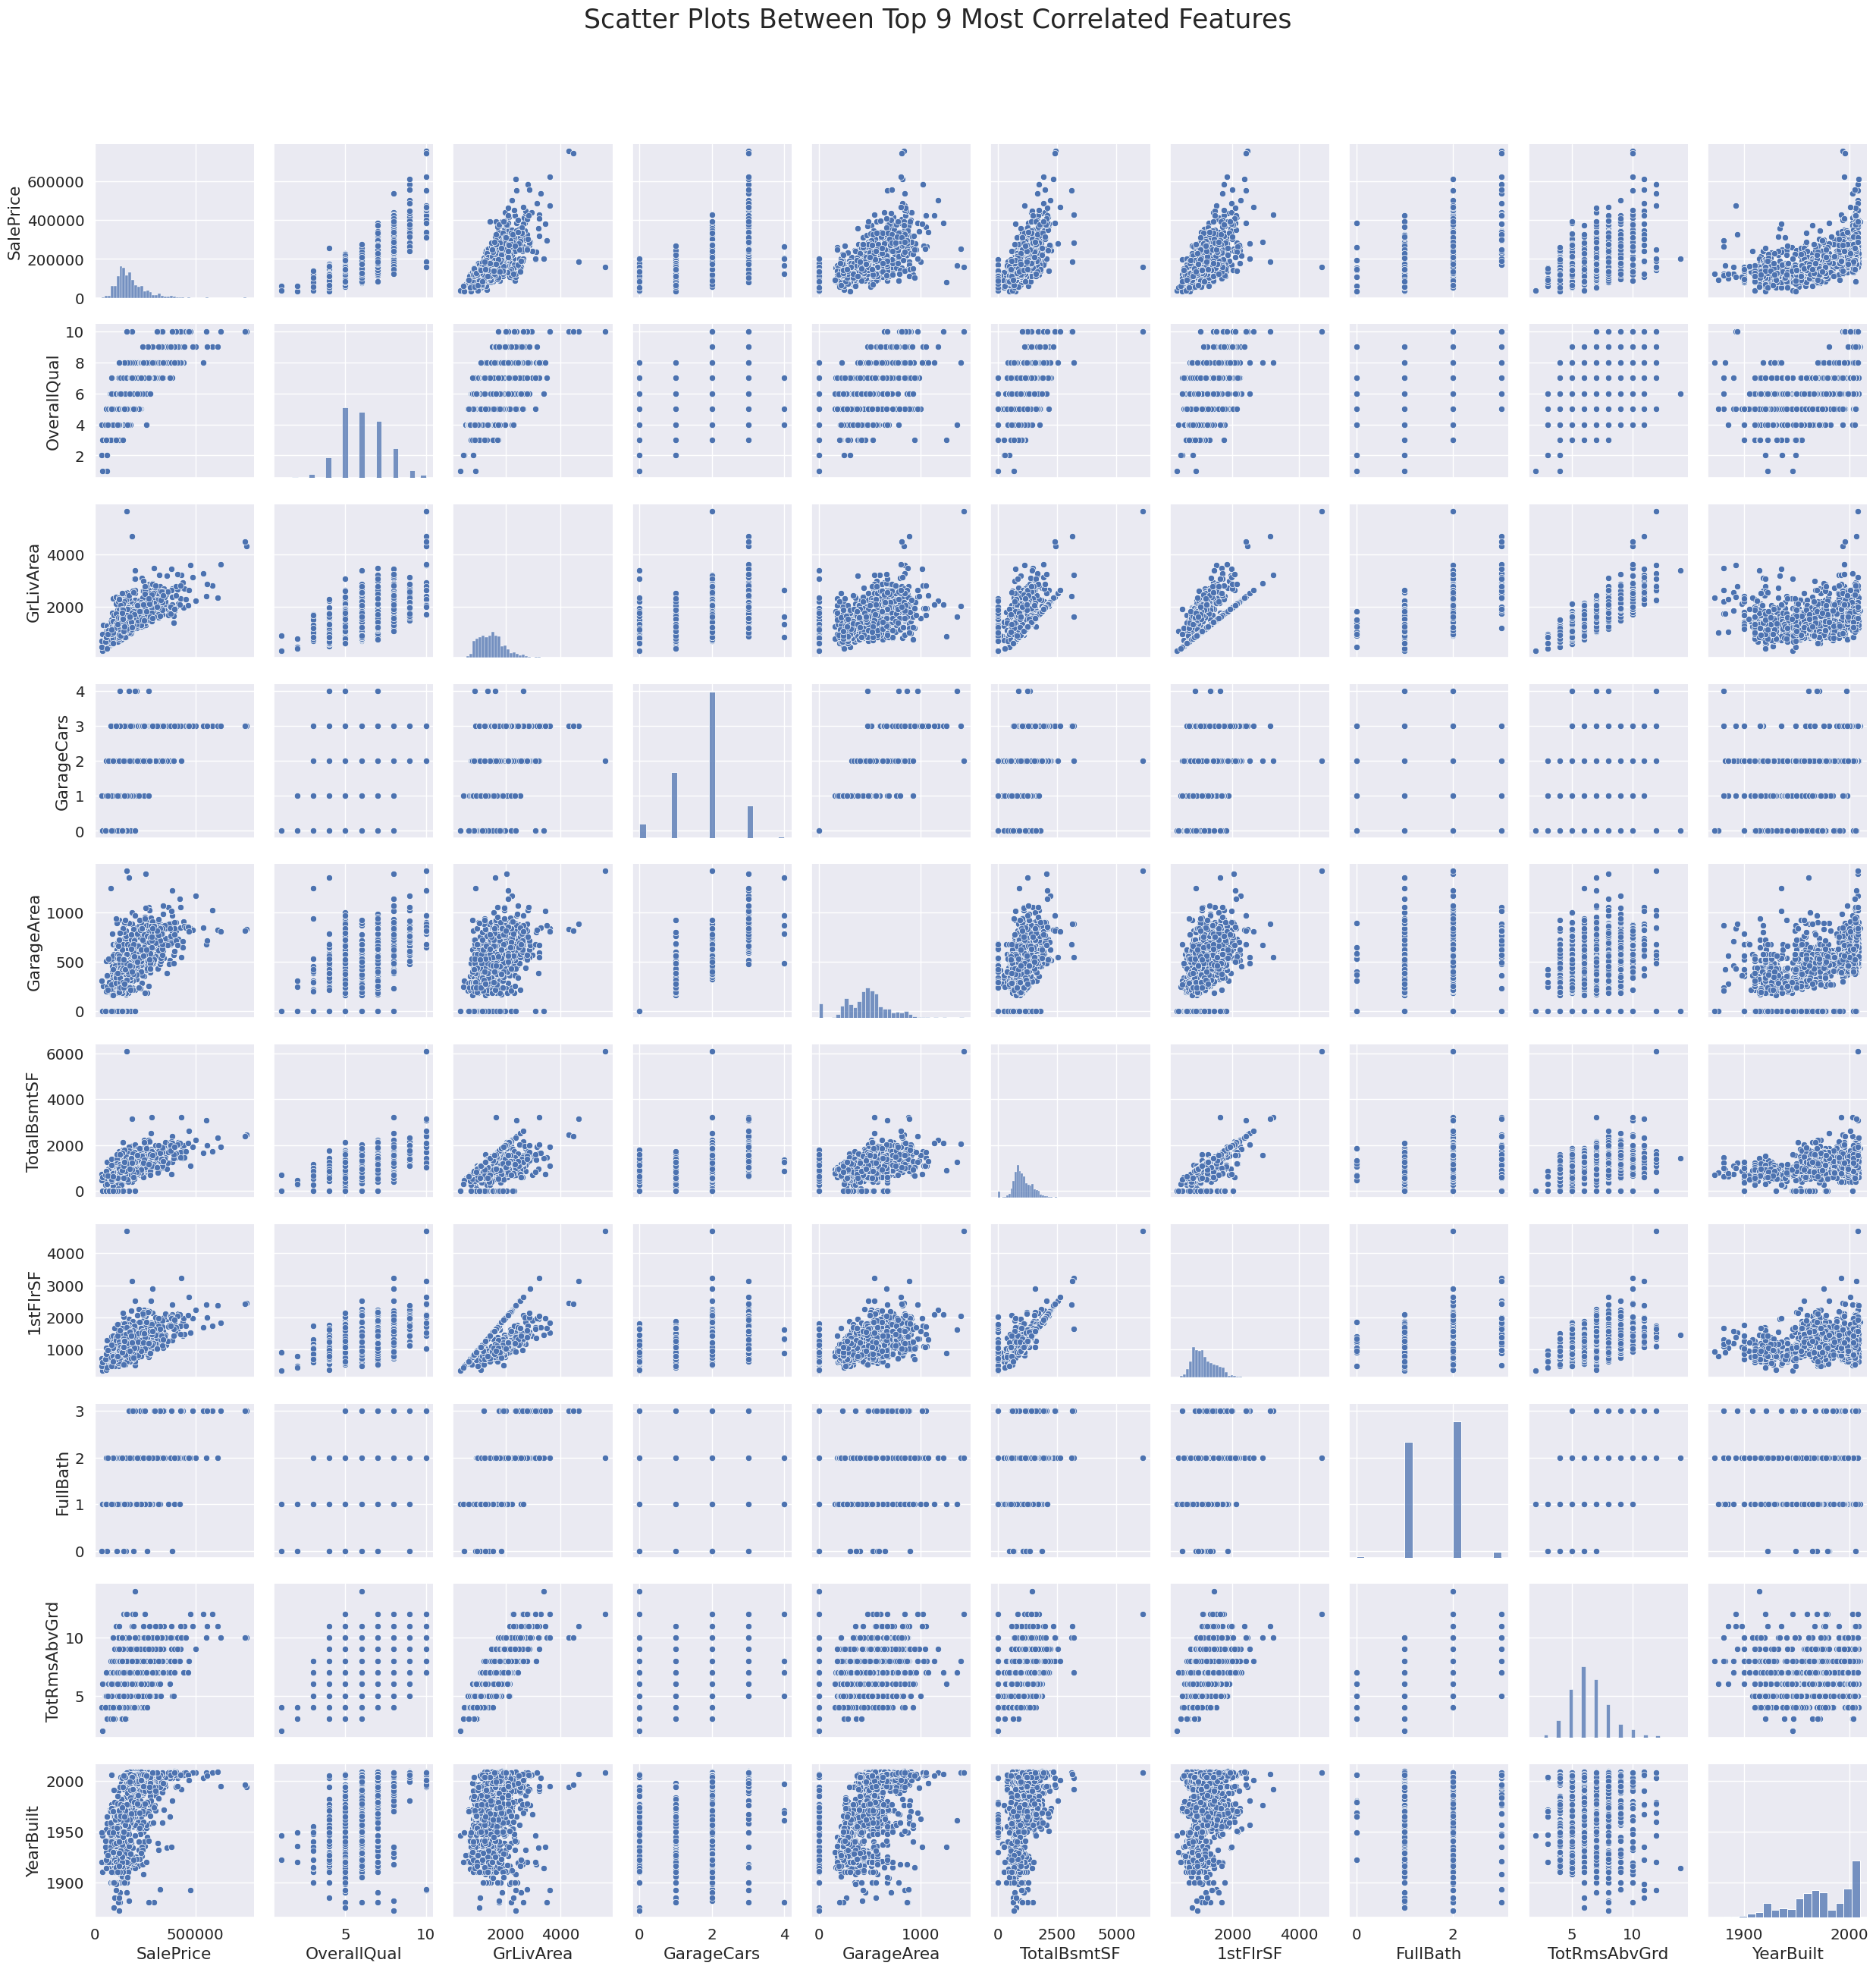

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 5, 5

corr = numeric_df.corr()["SalePrice"].abs().sort_values(ascending=False)

top_features = corr.index[1:10]

cols = ['SalePrice'] + list(top_features)

sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter Plots Between Top 9 Most Correlated Features', y=1.04, size=25)
plt.tight_layout()
plt.show()


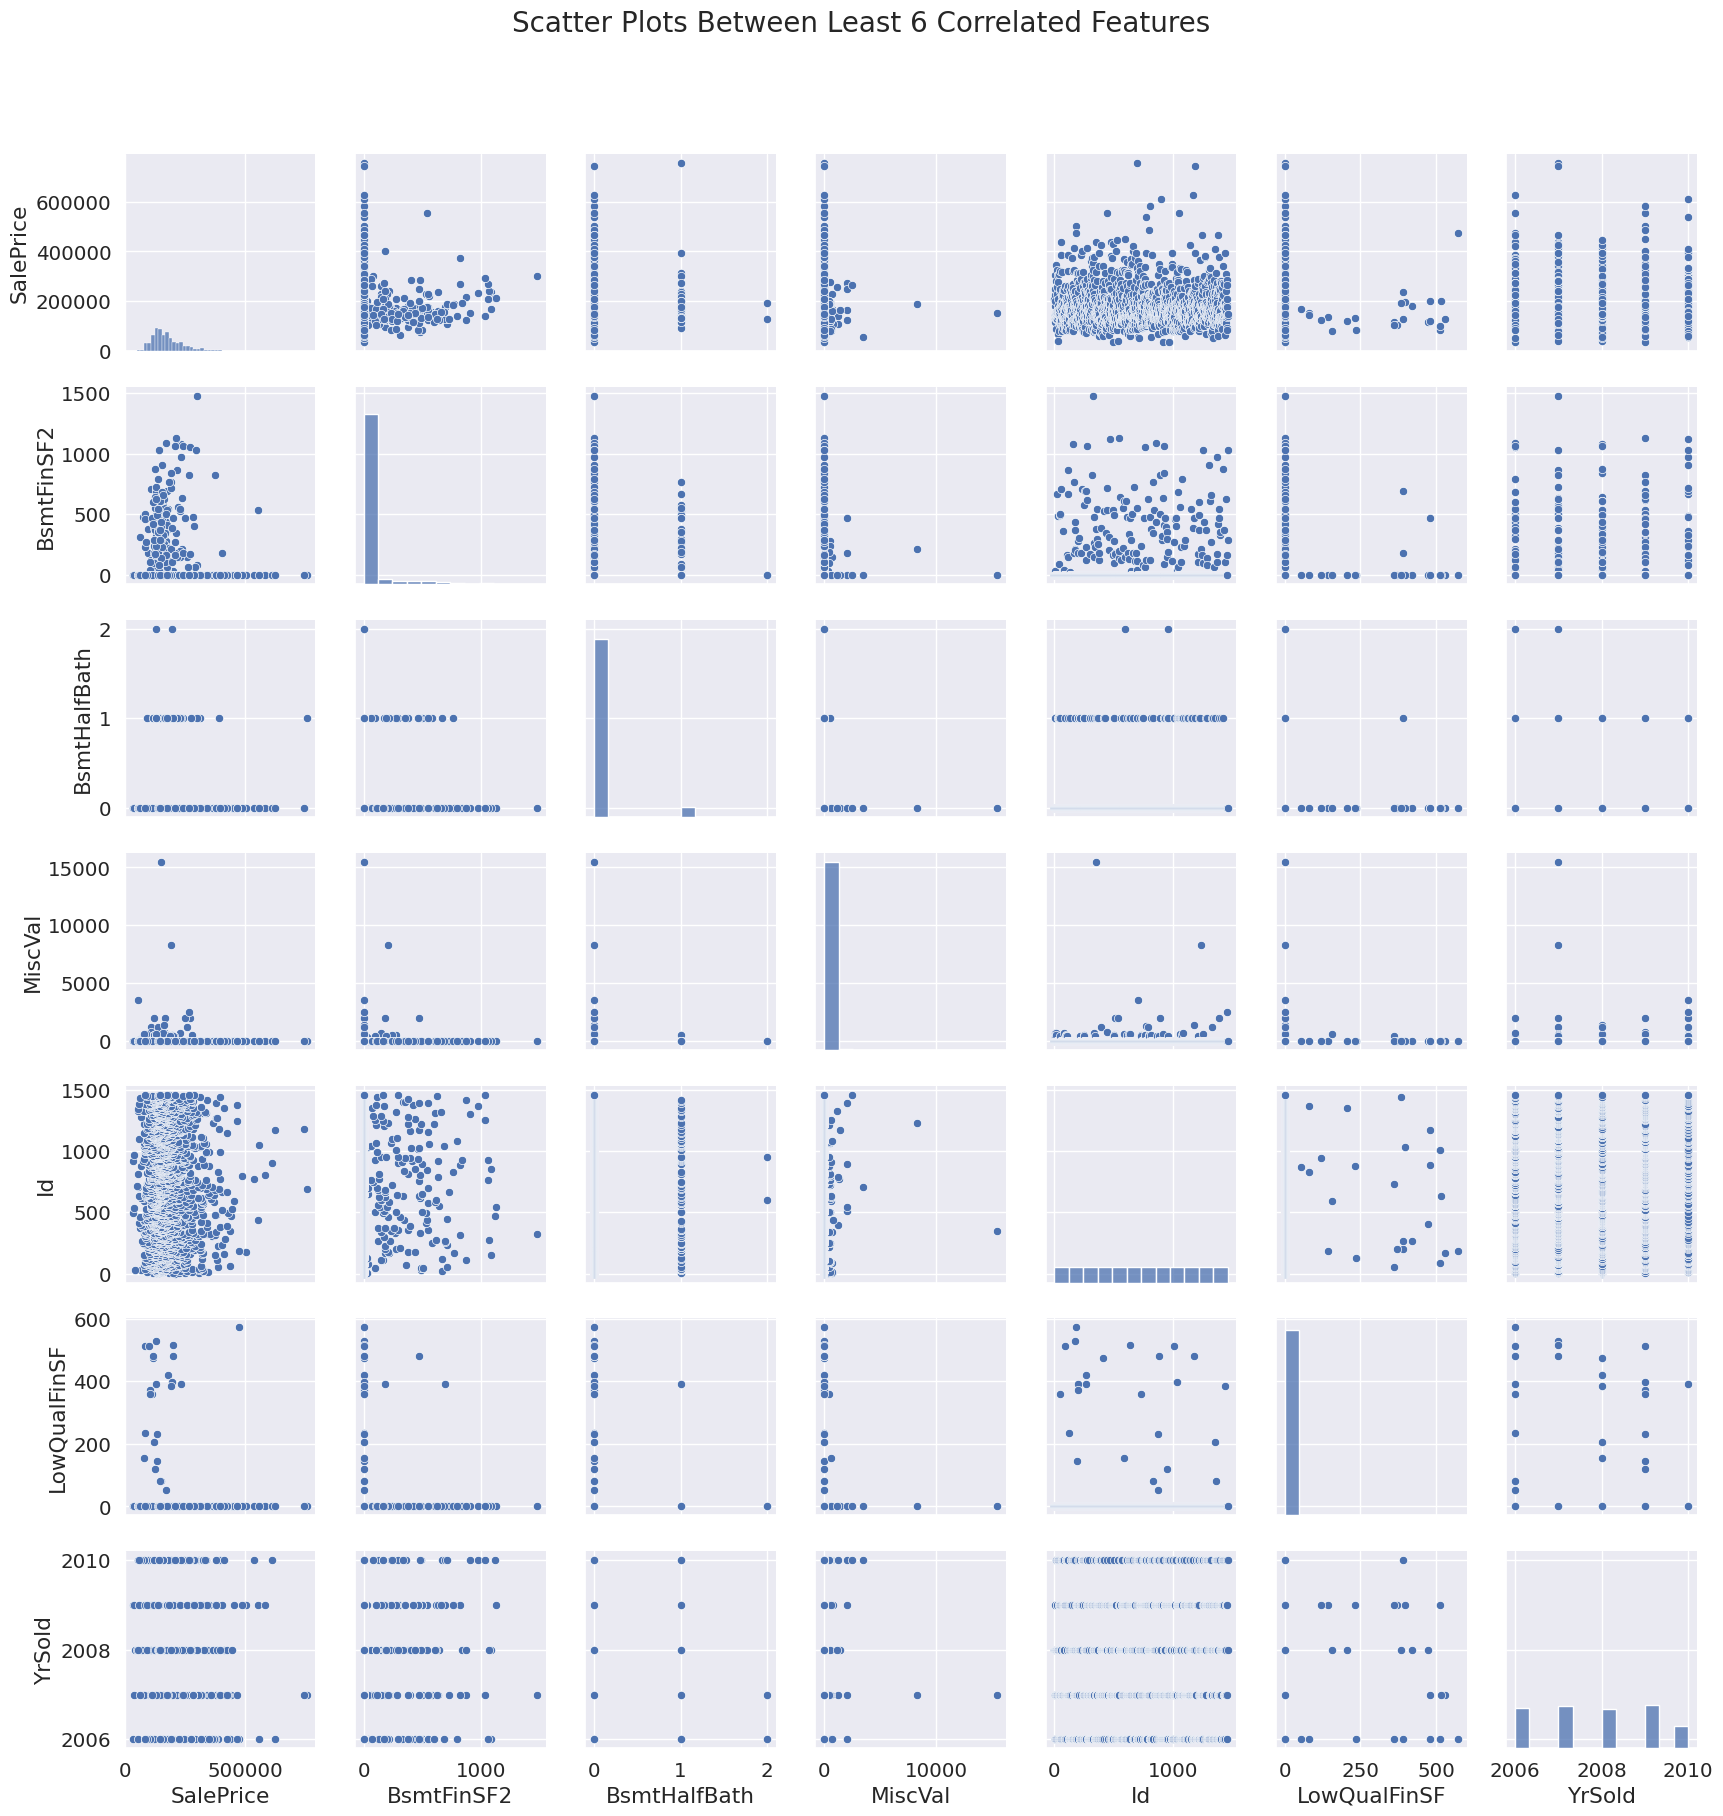

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 5, 5

corr = numeric_df.corr()["SalePrice"].abs().sort_values(ascending=True)

least_features = corr.index[:6]

cols = ['SalePrice'] + list(least_features)

sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter Plots Between Least 6 Correlated Features', y=1.04, size=20)
plt.tight_layout()
plt.show()


# **Feature Selection**

### **Objective**
Select features based on their strong correlation with `SalePrice` to create a refined dataset for further analysis or modeling.

---

### **Selected Features**
The following features were selected due to their high correlation with `SalePrice`:

1. **OverallQual**: 0.790982
2. **GrLivArea**: 0.708624
3. **GarageCars**: 0.640409
4. **GarageArea**: 0.623431
5. **TotalBsmtSF**: 0.613581
6. **1stFlrSF**: 0.605852
7. **FullBath**: 0.560664
8. **TotRmsAbvGrd**: 0.533723
9. **YearBuilt**: 0.522897
10. **YearRemodAdd**: 0.507101
11. **GarageYrBlt**: 0.486362
12. **MasVnrArea**: 0.477493
13. **Fireplaces**: 0.466929


In [ ]:
# List of selected features based on correlation with SalePrice
selected_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
    'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea',
    'Fireplaces'
]

# Select only numeric features from the dataset
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

df_train = df_train[
    list(set(selected_features).intersection(numeric_columns)) +
    [col for col in df_train.columns if col not in numeric_columns or col == 'SalePrice']
]

df_test = df_test[
    list(set(selected_features).intersection(numeric_columns)) +
    [col for col in df_test.columns if col not in numeric_columns]
]


In [ ]:
df_train.shape,df_test.shape

((1460, 57), (1459, 56))

In [ ]:
# Checking for outliers
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[a], y = df_train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

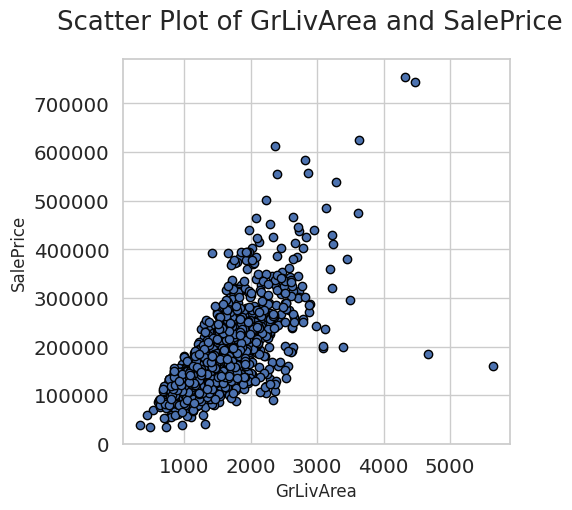

In [ ]:
scatter_plot('GrLivArea')


- It can be observed that there are large outliers which can negatively affect the prediction of sale price highly
- So the outliers need to be deleted

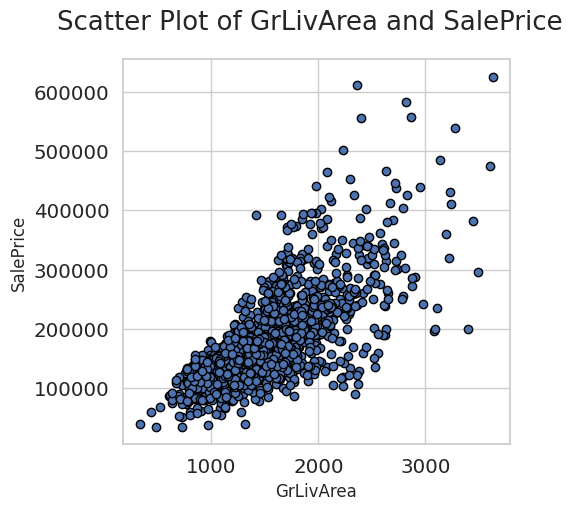

In [ ]:
#Deleting outliers
df_train = df_train.drop(df_train[
    (df_train['GrLivArea'] > 4500) |
    (df_train['SalePrice'] > 700000)
].index)

# Check the graphic again
scatter_plot('GrLivArea')

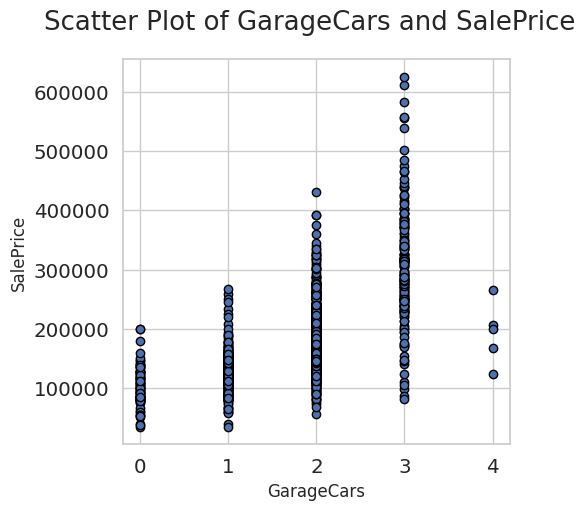

In [ ]:
scatter_plot('GarageCars')

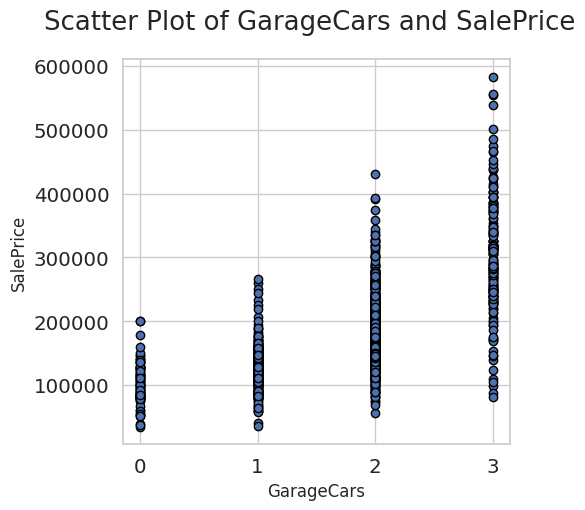

In [ ]:
# Deleting outliers
df_train = df_train.drop(df_train[
    (df_train['GarageCars'] > 3) |
    (df_train['SalePrice'] > 600000)
].index)

# Check the graphic again
scatter_plot('GarageCars')


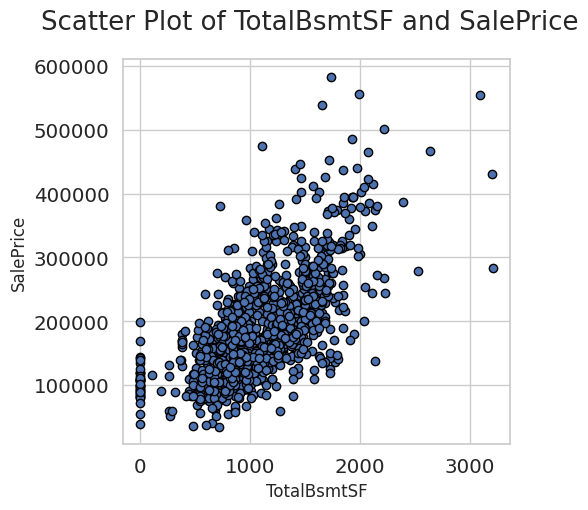

In [ ]:
scatter_plot('TotalBsmtSF')

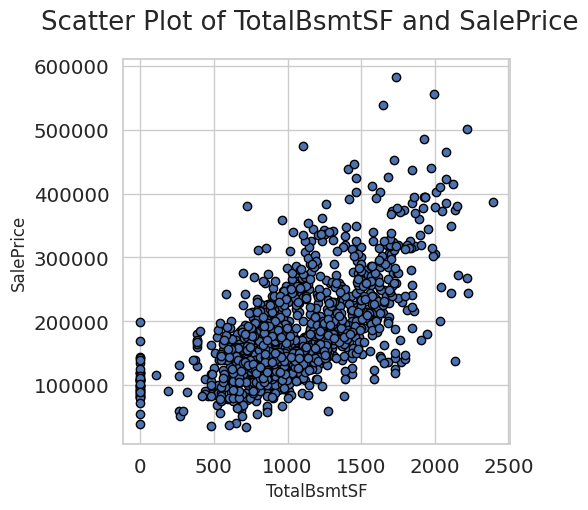

In [ ]:
df_train = df_train.drop(df_train[
    (df_train['TotalBsmtSF'] > 2500) |
    (df_train['SalePrice'] > 600000)
].index)

# Check the graphic again
scatter_plot('TotalBsmtSF')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

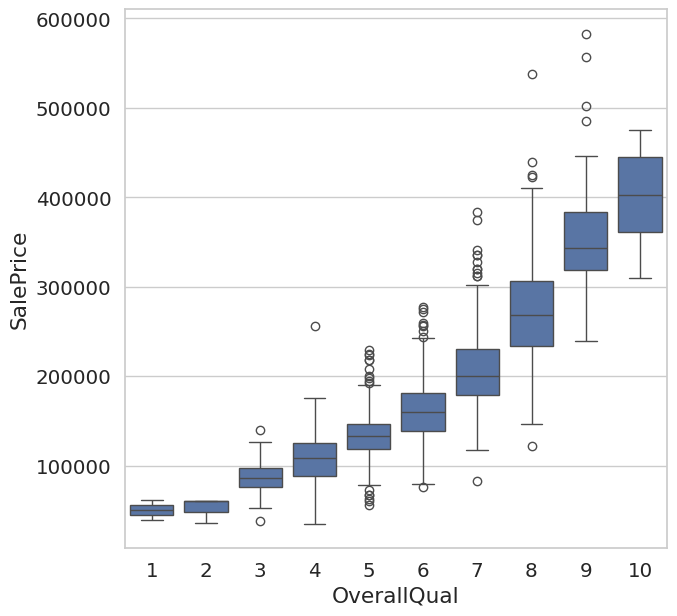

In [ ]:
# plot a box plot for categorical feature : Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.boxplot(x = df_train['OverallQual'], y="SalePrice", data = data)

In [ ]:
filtered_df = pd.DataFrame()

for qual in df_train['OverallQual'].unique():
    subset = df_train[df_train['OverallQual'] == qual]
    Q1 = subset['SalePrice'].quantile(0.25)
    Q3 = subset['SalePrice'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    subset_filtered = subset[(subset['SalePrice'] >= lower_bound) & (subset['SalePrice'] <= upper_bound)]
    filtered_df = pd.concat([filtered_df, subset_filtered], ignore_index=True)

df_train = filtered_df

print(f"Data shape after outlier removal: {df_train.shape}")

Data shape after outlier removal: (1395, 57)


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

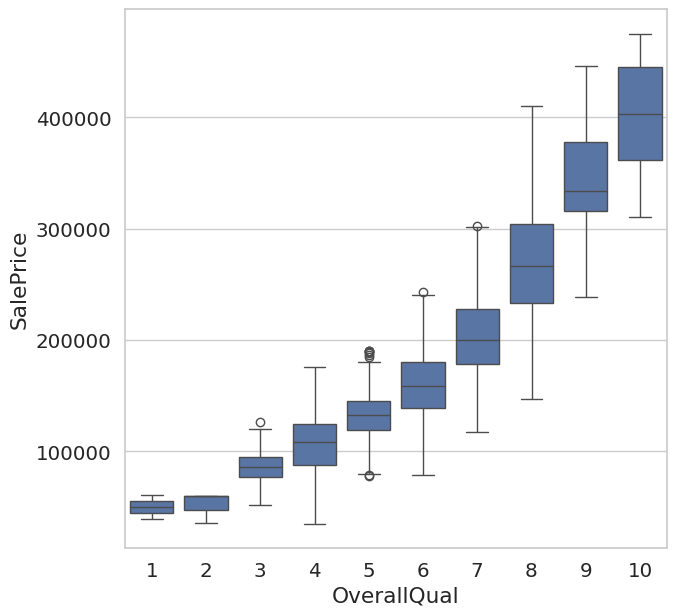

In [ ]:
fig = plt.figure(figsize=(7,7))
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.boxplot(x = df_train['OverallQual'], y="SalePrice", data = data)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110],
 [Text(0, 0, '1875'),
  Text(1, 0, '1880'),
  Text(2, 0, '1882'),
  Text(3, 0, '1885'),
  Text(4, 0, '1890'),
  Text(5, 0, '1892'),
  Text(6, 0, '1893'),
  Text(7, 0, '1898'),
  Text(8, 0, '1900'),
  Text(9, 0, '1904'),
  Text(10, 0, '1905'),
  Text(11, 0, '1906'),
  Text(12, 0, '1908'),
  Text(13, 0, '1910'),
  Text(14, 0, '1911'

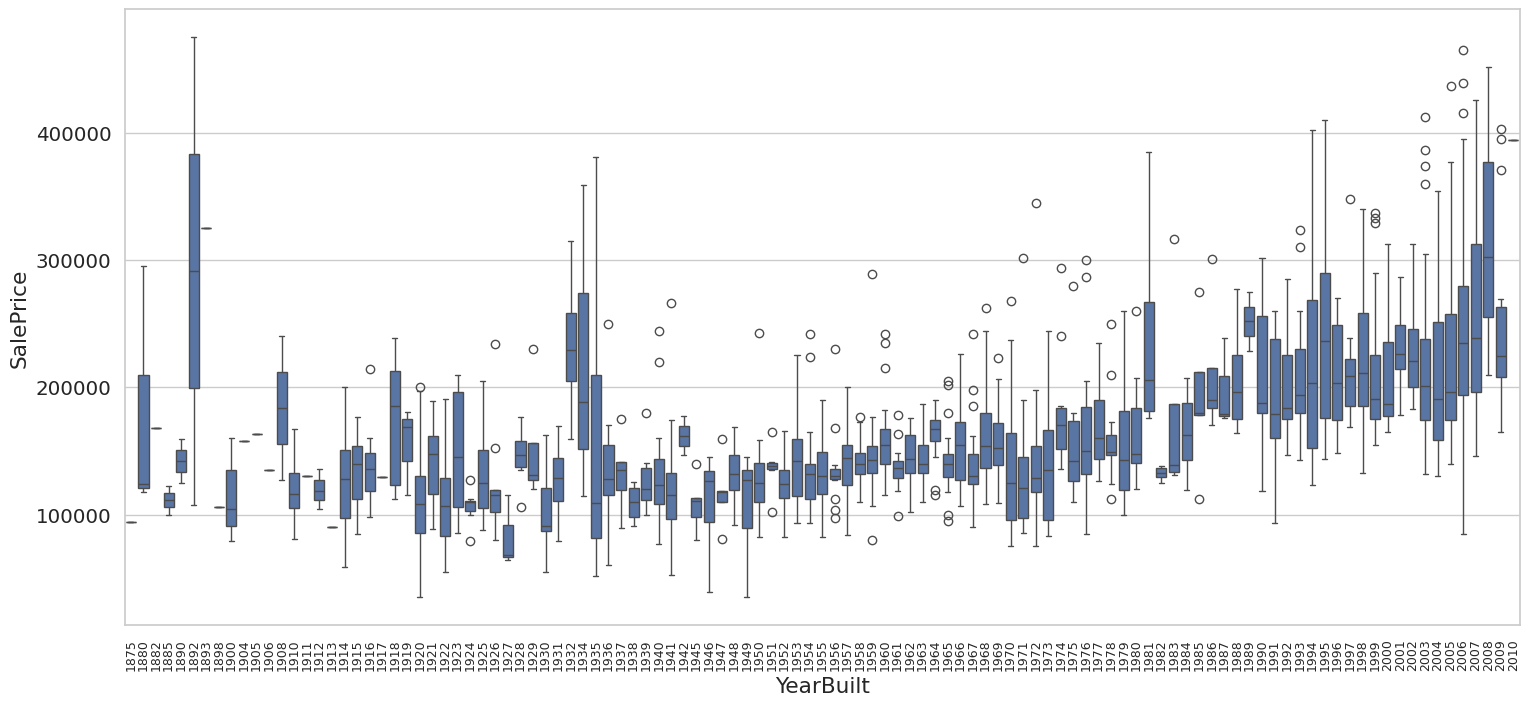

In [ ]:
# plot a box plot for categorical feature : Year Built
fig = plt.figure(figsize=(18,8))

data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
sns.boxplot(x= df_train['YearBuilt'], y="SalePrice", data=data)
plt.xticks(rotation=90,fontsize= 9)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110],
 [Text(0, 0, '1875'),
  Text(1, 0, '1880'),
  Text(2, 0, '1882'),
  Text(3, 0, '1885'),
  Text(4, 0, '1890'),
  Text(5, 0, '1892'),
  Text(6, 0, '1893'),
  Text(7, 0, '1898'),
  Text(8, 0, '1900'),
  Text(9, 0, '1904'),
  Text(10, 0, '1905'),
  Text(11, 0, '1906'),
  Text(12, 0, '1908'),
  Text(13, 0, '1910'),
  Text(14, 0, '1911'

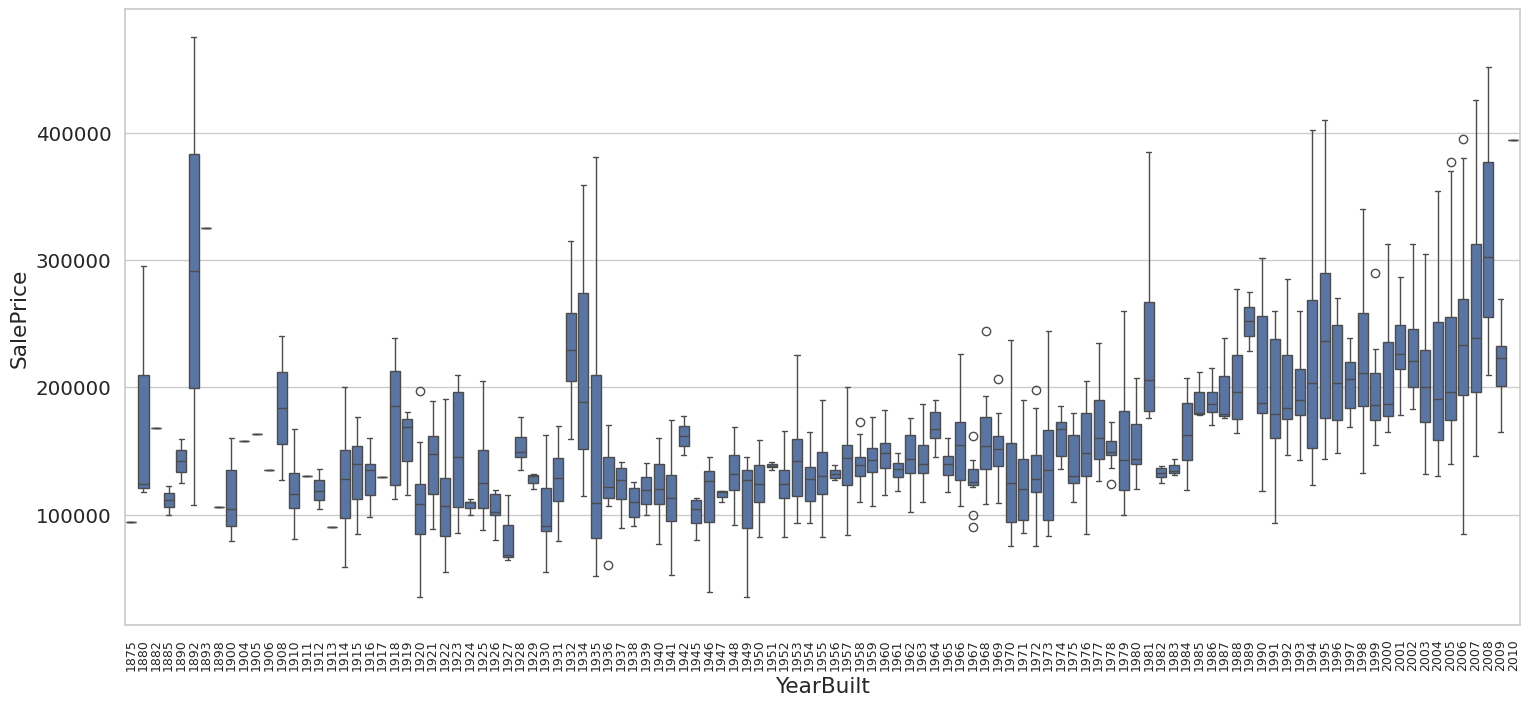

In [ ]:
filtered_df = pd.DataFrame()

for year in df_train['YearBuilt'].unique():
    subset = df_train[df_train['YearBuilt'] == year]
    Q1 = subset['SalePrice'].quantile(0.25)
    Q3 = subset['SalePrice'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    subset_filtered = subset[(subset['SalePrice'] >= lower_bound) & (subset['SalePrice'] <= upper_bound)]
    filtered_df = pd.concat([filtered_df, subset_filtered], ignore_index=True)

df_train = filtered_df


fig = plt.figure(figsize=(18,8))

data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
sns.boxplot(x= df_train['YearBuilt'], y="SalePrice", data=data)
plt.xticks(rotation=90,fontsize= 9)

Skewness: 1.203057
Kurtosis: 1.926828


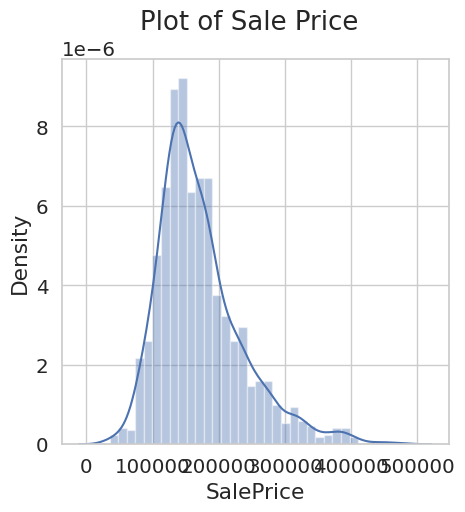

In [ ]:
sns.distplot(df_train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

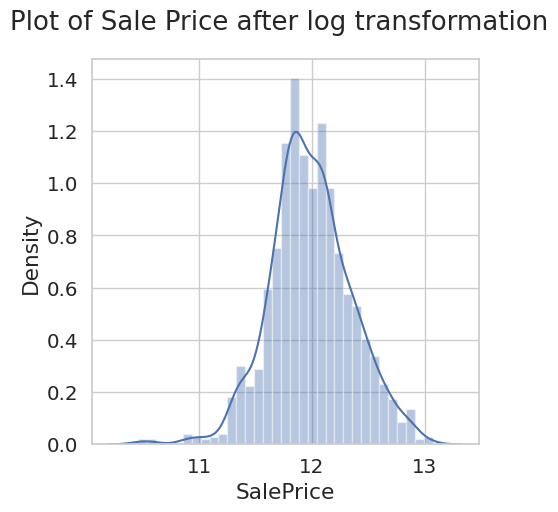

In [ ]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally

df_train['SalePrice'] = np.log(df_train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(df_train['SalePrice'])
plt.show()

In [ ]:
df_train['SalePrice'].describe()

,SalePrice
count,1314.000000
mean,11.990400
std,0.360450
min,10.460242
25%,11.767568
50%,11.970350
75%,12.206601
max,13.071070


In [ ]:
df_train['SalePrice']

,SalePrice
0,12.247694
1,12.387085
2,12.328290
3,12.206073
4,12.100712
...,...
1309,13.071070
1310,12.885202
1311,11.512925
1312,11.715866


In [ ]:
df_train.shape

(1314, 57)

In [ ]:
#function to see the missing data in a dataframe
def missing_data(df,n):
    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values
    No_unique_val = df.nunique()                                   # No of unique values
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1,
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)

    print(missing_data.head(n))

In [ ]:
#training data
missing_data(df_train,20)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1311         99.771689                 3
MiscFeature                      1267         96.423135                 3
Alley                            1231         93.683409                 2
Fence                            1059         80.593607                 4
MasVnrType                        792         60.273973                 3
FireplaceQu                       658         50.076104                 5
GarageYrBlt                        72          5.479452                97
GarageType                         72          5.479452                 6
GarageQual                         72          5.479452                 5
GarageCond                         72          5.479452                 5
GarageFinish                       72          5.479452                 3
BsmtExposure                       33          2.511416                 4
BsmtQual                           32 

In [ ]:
df_train['PoolQC'].unique()

array([nan, 'Gd', 'Ex', 'Fa'], dtype=object)

- PoolQC,Alley have only two unique values
- PoolQC has 99.7% of missing data, which means most of the values are NA: No Pool ie most of the houses do not have a pool
- PoolQC,Alley,MiscFeature will be dropped due to large number of missing values

In [ ]:
#test data
missing_data(df_test,34)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1456         99.794380                 2
MiscFeature                      1408         96.504455                 3
Alley                            1352         92.666210                 2
Fence                            1169         80.123372                 4
MasVnrType                        894         61.274846                 3
FireplaceQu                       730         50.034270                 5
GarageCond                         78          5.346127                 5
GarageYrBlt                        78          5.346127                97
GarageQual                         78          5.346127                 4
GarageFinish                       78          5.346127                 3
GarageType                         76          5.209047                 6
BsmtCond                           45          3.084304                 4
BsmtExposure                       44 

In [ ]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

- all records mostly "AllPub" for Utilities
- PoolQC,Alley,MiscFeature will be dropped due to large number of missing values
- Utilities has only 1 unique value
- Utility will also be dropped

In [ ]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

6847
7644


In [ ]:
# save the 'SalePrice'column as train_label
train_label = df_train['SalePrice'].reset_index(drop=True)

# # drop 'SalePrice' column from df_train
df_train = df_train.drop(['SalePrice'], axis=1)
# # now df_train contains all training features

In [ ]:
# function to HANDLE the missing data in a dataframe
def missing (df):

    # drop theses columns due to large null values or many same values
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)

    # Null value likely means No Fence so fill as "None"
    df["Fence"] = df["Fence"].fillna("None")

    # Null value likely means No Fireplace so fill as "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

    # Null value likely means  typical(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")

    # Only one null value so fill as the most frequent value(mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

    # Only one null value so fill as the most frequent value(mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

    # Very few null value so fill with the most frequent value(mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

    # Null value likely means no masonry veneer
    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o

    # Only one null value so fill as the most frequent value(mode)
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')

    # Null value likely means No Garage and no cars in garage, so fill as 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)

    # Null value likely means No Basement, so fill as 0
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)

    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')

    return df

In [ ]:
df_train = missing(df_train)
df_test = missing(df_test)

In [ ]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [ ]:
df_train.shape,df_test.shape

((1314, 52), (1459, 52))

In [ ]:
#training data
g1 = df_train.columns.to_series().groupby(df_train.dtypes).groups

In [ ]:
{k.name: v for k, v in g1.items()}

{'int64': Index(['GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea', 'Fireplaces',
        'FullBath', 'YearBuilt', '1stFlrSF', 'TotRmsAbvGrd', 'YearRemodAdd',
        'TotalBsmtSF'],
       dtype='object'),
 'float64': Index(['GarageYrBlt', 'MasVnrArea'], dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
       dtype='object')}

In [ ]:
#testing data
g2 = df_test.columns.to_series().groupby(df_test.dtypes).groups

In [ ]:
{k.name: v for k, v in g2.items()}

{'int64': Index(['GrLivArea', 'OverallQual', 'Fireplaces', 'FullBath', 'YearBuilt',
        '1stFlrSF', 'TotRmsAbvGrd', 'YearRemodAdd'],
       dtype='object'),
 'float64': Index(['GarageCars', 'GarageArea', 'GarageYrBlt', 'MasVnrArea', 'TotalBsmtSF'], dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
       dtype='object')}

In [ ]:
#get dummy values for categorical data
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print(df_train.shape)
print(df_test.shape)

(1314, 260)
(1459, 250)


In [ ]:
#align the training and testing data
df_train, df_test = df_train.align(df_test, join = 'inner', axis=1)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(1314, 249)
(1459, 249)


In [ ]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [ ]:
df_train.head(5)

,GrLivArea,OverallQual,GarageCars,GarageArea,Fireplaces,FullBath,YearBuilt,1stFlrSF,TotRmsAbvGrd,GarageYrBlt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1710,7,2,548,0,2,2003,856,8,2003.0,...,False,False,False,True,False,False,False,False,True,False
1,2149,7,2,670,1,1,2003,1518,6,2003.0,...,False,False,False,True,True,False,False,False,False,False
2,1479,7,2,558,0,2,2003,1479,7,2003.0,...,False,False,False,True,False,False,False,False,True,False
3,2082,7,2,484,0,2,2003,1362,6,2003.0,...,False,False,False,True,False,False,False,False,True,False
4,1668,7,2,500,0,2,2003,840,8,2003.0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df_test.head(5)

,GrLivArea,OverallQual,GarageCars,GarageArea,Fireplaces,FullBath,YearBuilt,1stFlrSF,TotRmsAbvGrd,GarageYrBlt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,896,5,1.0,730.0,0,1,1961,896,5,1961.0,...,False,False,False,True,False,False,False,False,True,False
1,1329,6,1.0,312.0,0,1,1958,1329,6,1958.0,...,False,False,False,True,False,False,False,False,True,False
2,1629,5,2.0,482.0,1,2,1997,928,6,1997.0,...,False,False,False,True,False,False,False,False,True,False
3,1604,6,2.0,470.0,1,2,1998,926,7,1998.0,...,False,False,False,True,False,False,False,False,True,False
4,1280,8,2.0,506.0,0,2,1992,1280,5,1992.0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Columns: 249 entries, GrLivArea to SaleCondition_Partial
dtypes: bool(236), float64(2), int64(11)
memory usage: 436.4 KB


In [ ]:
X_test = df_test           # testing features

In [ ]:
df_train["SalePrice"] = train_label

In [ ]:
df_train.head()

,GrLivArea,OverallQual,GarageCars,GarageArea,Fireplaces,FullBath,YearBuilt,1stFlrSF,TotRmsAbvGrd,GarageYrBlt,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1710,7,2,548,0,2,2003,856,8,2003.0,...,False,False,True,False,False,False,False,True,False,12.247694
1,2149,7,2,670,1,1,2003,1518,6,2003.0,...,False,False,True,True,False,False,False,False,False,12.387085
2,1479,7,2,558,0,2,2003,1479,7,2003.0,...,False,False,True,False,False,False,False,True,False,12.328290
3,2082,7,2,484,0,2,2003,1362,6,2003.0,...,False,False,True,False,False,False,False,True,False,12.206073
4,1668,7,2,500,0,2,2003,840,8,2003.0,...,False,False,True,False,False,False,False,True,False,12.100712


In [ ]:
train_set, valid_set = train_test_split(df_train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  # training features
y_train = train_set["SalePrice"].copy()             # training label

X_valid = valid_set.drop(["SalePrice"], axis=1)  # testing features
y_valid = valid_set["SalePrice"].copy()               # testing label

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))
print()
print("X_test shape: {}".format(X_test.shape))

X_train shape: (919, 249)
y_train shape: (919,)

X_valid shape: (395, 249)
y_valid shape: (395,)

X_test shape: (1459, 249)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 918
Columns: 249 entries, GrLivArea to SaleCondition_Partial
dtypes: bool(236), float64(2), int64(11)
memory usage: 312.3 KB


In [ ]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, 919 to 1313
Columns: 249 entries, GrLivArea to SaleCondition_Partial
dtypes: bool(236), float64(2), int64(11)
memory usage: 134.2 KB


In [ ]:
y_train

,SalePrice
0,12.247694
1,12.387085
2,12.328290
3,12.206073
4,12.100712
...,...
914,11.561716
915,11.669929
916,11.512925
917,11.289782


In [ ]:
y_valid

,SalePrice
919,10.868568
920,12.154516
921,12.384219
922,12.128111
923,11.775290
...,...
1309,13.071070
1310,12.885202
1311,11.512925
1312,11.715866


In [ ]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

0
0


In [ ]:
null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
0


- No null values in X_valid and y_valid


In [ ]:
# calculating cross validation score with scoring set to negative mean absolute error
def cross_validation(model):

    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

In [ ]:
# function to calculate Root mean square error (RMSE)
def rmse(y_pred, y_train):

    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred,y_train))
    print("rmse: ", rmse_)

In [ ]:
# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train,y_pred):

    fig = plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()

    ax.scatter(y_train, y_pred,color = "teal",edgecolor = 'lightblue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()

#### 1. LINEAR REGRESSION MODEL
- Linear Regression is the first model used. In this model, the target value is expected to be a linear combination of the features. The coefficients are set to minimize the residual sum of squares between the target predicted and the observed features

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
cross_validation(reg)

Mean CV score:  0.1359836517885422


In [ ]:
#fit on training
model_reg = reg.fit(X_train, y_train)

#predict value of sale price on the training set
y1_pred = reg.predict(X_train)

#caculate root mean square error
rmse(y1_pred,y_train)

rmse:  0.08310254281070148


In [ ]:
#predict value of sale price on the validation set
y1_pred_v = reg.predict(X_valid)

#caculate root mean square error
rmse(y1_pred_v, y_valid)

rmse:  0.1605823967420022


<Figure size 1200x1200 with 0 Axes>

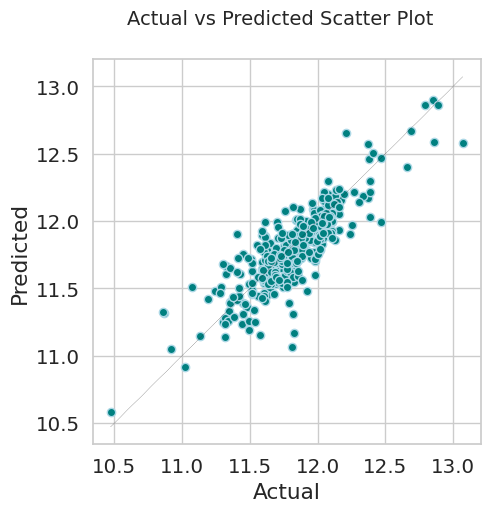

In [ ]:
#plot
actual_vs_pred_plot(y_valid,y1_pred_v)

#### 2. Random Forest Model
- Random forest model is an ensemble method based on randomized decision trees. Grid search was used to select the best parameters with a 5-fold cross validation. The number of trees in the forest was set to 300 with a maximum depth of 10.

In [ ]:
rforest = RandomForestRegressor(n_estimators=300,max_depth=10,random_state=42)

In [ ]:
cross_validation(rforest)

Mean CV score:  0.1299257644746785


In [ ]:
#fit
model_rforest = rforest.fit(X_train, y_train)

#predict value of sale price on the training set
y6_pred = rforest.predict(X_train)

#caculate root mean square error
rmse(y6_pred,y_train)

rmse:  0.05297600781641384


In [ ]:
#predict value of sale price on the validation set
y6_pred_v = rforest.predict(X_valid)

#caculate root mean square error
rmse(y6_pred_v, y_valid)

rmse:  0.1504198505988461


<Figure size 1200x1200 with 0 Axes>

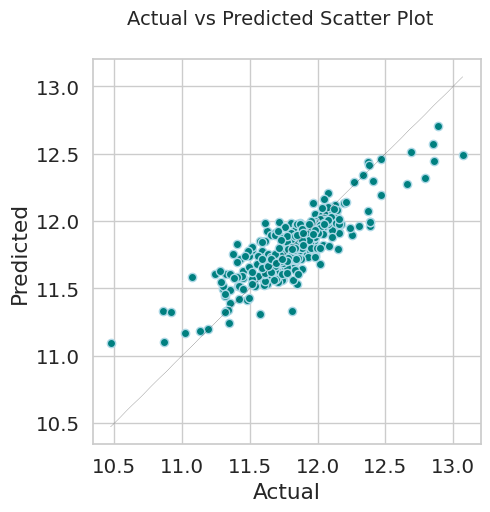

In [ ]:
#plot
actual_vs_pred_plot(y_valid, y6_pred_v)

# Evaluation

### **Results**
| Metric             | Linear Regression | Random Forest |
|--------------------|-------------------|---------------|
| **Mean CV Score**  | 0.1359            | 0.1299        |
| **RMSE (Train)**   | 0.0831            | 0.0530        |
| **RMSE (Valid)**   | 0.1606            | 0.1504        |

### **Analysis**
1. **Cross-Validation**: Random Forest achieves a lower mean CV score (0.1299 vs. 0.1359), indicating better generalization across folds compared to Linear Regression.
2. **Training Performance**: Random Forest demonstrates superior fitting on the training data (RMSE: 0.0530 vs. 0.0831), effectively capturing complex patterns.
3. **Validation Performance**: Random Forest outperforms Linear Regression on validation data (RMSE: 0.1504 vs. 0.1606), suggesting better generalization.

### **Conclusion**
- **Linear Regression**: Simpler, but struggles to model non-linear relationships effectively.
- **Random Forest**: More robust for non-linear patterns and overall better performance, making it a preferred choice with proper tuning.


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
# Write your code here
%pip install pandas transformers sklearn
import pandas as pd
import torch
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Load the dataset
dataset = pd.read_csv("imdb_movie_reviews_labelled.csv")
dataset.head()


,Review,Cleaned Review,Sentiment
0,Best movie ever!michalberanek20 July 2023I saw...,best movi evermichalberanek juli saw mani movi...,Positive
1,Fully told storyadamgontarz21 July 2023There w...,fulli told storyadamgontarz juli awesom hour c...,Positive
2,I did not expect to not love this filmpostman1...,expect love filmpostman juli oppenheim solid f...,Positive
3,Iconic quote in the sex scene!??cagatanberitan...,icon quot sex scenecagatanberitan juli warn sp...,Neutral
4,"Overwhelming, powerful and emphatic, a film th...",overwhelm power emphat film stay youpotassiumm...,Positive


## Selected Model: CardiffNLP Twitter RoBERTa Base Sentiment

### Description:
The **CardiffNLP Twitter RoBERTa Base Sentiment model** is a transformer-based language model fine-tuned specifically for sentiment analysis on tweets. Built upon the **RoBERTa architecture**, it leverages pretrained knowledge and specializes in understanding the informal and context-rich language of social media.

### Pretraining Data Sources:
The model was fine-tuned using:
- **Twitter datasets** collected across a wide range of domains and contexts to capture the nuances of sentiment in social media conversations.

### Number of Parameters:
- **RoBERTa-Base Architecture:** 125M parameters

### Key Features:
- **Adaptation to Social Media Texts**:
  - Fine-tuned for handling informal language, emojis, hashtags, and abbreviations commonly used in tweets.
- **Sentiment Labels**:
  - Classifies input into three sentiment categories:
    - **Positive**
    - **Neutral**
    - **Negative**
- **Robust Performance**:
  - Demonstrates strong performance in sentiment analysis for short, contextually rich text like tweets.
- **Lightweight Base Architecture**:
  - Retains the efficiency and scalability of the **RoBERTa-Base** model.

### Applications:
- Real-time sentiment analysis for social media monitoring.
- Understanding public sentiment for products, events, and trends.
- Analyzing feedback in customer service interactions.

This model is well-suited for zero-shot setups, enabling immediate sentiment classification on social media data without additional fine-tuning.


In [ ]:
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from scipy.special import softmax
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Preprocessing function to clean text
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Load RoBERTa model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Move the model to GPU
model = model.to(device)

# Function to predict sentiment for a single text
def predict_sentiment(text):
    text = preprocess(text)  # Preprocess text
    encoded_input = tokenizer(text, return_tensors="pt", truncation=True, max_length=512).to(device)
    with torch.no_grad():
        output = model(**encoded_input)
    scores = output[0][0].detach().cpu().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)[::-1]  # Get rankings
    # Get the label with the highest score
    return config.id2label[ranking[0]].lower()  # Convert prediction to lowercase

# Convert ground truth labels to lowercase
ground_truth = [label.lower() for label in dataset["Sentiment"].tolist()]

predictions = []
for review in dataset["Cleaned Review"]:
    predictions.append(predict_sentiment(review))

# Evaluate predictions against ground truth
accuracy = accuracy_score(ground_truth, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(
    ground_truth, predictions, average="weighted"
)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Using device: cuda


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Accuracy: 0.65
Precision: 0.72
Recall: 0.65
F1 Score: 0.66


### Discussion on the Selected PLM: CardiffNLP Twitter RoBERTa Base Sentiment

The **CardiffNLP Twitter RoBERTa Base Sentiment model** was applied to a reviews dataset, leveraging its robust pretraining and fine-tuning for sentiment analysis. The model demonstrated a **65% accuracy** and an **F1 score of 0.66**, reflecting its capability to perform reasonably well despite being optimized for social media text.

#### **Advantages**:
1. **Contextual Understanding**: The RoBERTa architecture ensures a strong grasp of linguistic patterns, enabling decent performance on the reviews dataset.
2. **Efficiency**: Its lightweight architecture (125M parameters) allowed for efficient execution on GPU with manageable computational demands.

#### **Challenges**:
1. **Domain Adaptation**: Since the model was fine-tuned on Twitter data, adapting it to the reviews domain presented challenges, such as handling longer and more formal text structures.
2. **Performance Limitations**: While the model achieved moderate accuracy, the **65% recall** highlights occasional struggles in identifying true sentiments, likely due to differences between Twitter and review data.

In summary, the model effectively applied pretraining knowledge to the reviews dataset but encountered limitations due to domain-specific nuances. Further fine-tuning on review data could improve its performance for this task.
